### Prescription Drugs Affecting School Students - Team 5

In [80]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

### READ DATA

In [81]:
# Table data with substannce abuse by demographics (age, sex and race)
df = pd.read_csv('table051_reduced.csv', encoding="UTF-8")
# Data with accidental death by demographics
df1 = pd.read_csv('AcciDrugRelatedDeaths2012to18.csv', encoding='UTF-8')
# Table data with death rates by age group
df2 = pd.read_csv('table027_reduced.csv', encoding="UTF-8")

### DATA MERGING

In [88]:
df.head()

,demography,Substance,1980,1981,1982,1983,1984,1985,1986,1987,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,All 12th graders,Cigarettes,30.5,29.4,30.0,30.3,29.3,30.1,29.6,29.4,...,21.6,20.4,20.1,19.2,18.7,17.1,16.3,13.6,11.4,10.5
1,Male,Cigarettes,26.8,26.5,26.8,28.0,25.9,28.2,27.9,27.0,...,23.1,21.5,22.1,21.9,21.5,19.3,18.4,15.2,13.0,12.7
2,Female,Cigarettes,33.4,31.6,32.6,31.6,31.9,31.4,30.6,31.4,...,19.6,19.1,17.6,15.7,15.1,14.5,13.2,11.6,9.1,8.1
3,White,Cigarettes,31.0,30.1,31.3,31.3,31.0,31.7,32.0,32.2,...,25.2,24.1,23.7,22.2,22.2,20.1,18.5,16.5,13.4,13.0
4,Black or African American,Cigarettes,25.2,22.3,21.2,21.2,17.6,18.7,14.6,13.9,...,10.6,10.1,9.3,10.7,8.7,8.4,10.8,7.5,6.4,5.5


In [89]:
# Added one more code line to rename
df.rename({'grade in school, sex, and race': 'demography'}, axis=1, inplace=True)

In [90]:
#drop_df = df.dropna(how='any')
group_test = df[['demography','Substance','2016']]
group_test.head()

,demography,Substance,2016
0,All 12th graders,Cigarettes,10.5
1,Male,Cigarettes,12.7
2,Female,Cigarettes,8.1
3,White,Cigarettes,13.0
4,Black or African American,Cigarettes,5.5


In [91]:
#create dataframe by grade level
grade_level = group_test
grade_level=grade_level.set_index('demography')

#delete unwanted rows
grade_level = grade_level.drop(['Female','Male','White','Black or African American'])

#rearrange data grouping by substance
grade_level.reset_index()
substance_bygrade = grade_level.pivot_table(index='demography',
                                     columns='Substance',
                                     values = '2016')
substance_bygrade



Substance,Alcohol2/,Binge drinking3/,Cigarettes,Cocaine,E-cigarettes,Inhalants,MDMA (Ecstasy)1/,Marijuana
demography,,,,,,,,
All 10th graders,19.9,9.7,4.9,0.4,10.3,1.0,0.5,14.0
All 12th graders,33.2,15.5,10.5,0.9,12.4,0.8,0.9,22.5
All 8th graders,7.3,3.4,2.6,0.3,6.2,1.8,0.3,5.4


### Graph the substance by grade


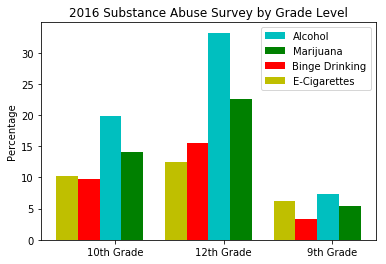

In [92]:
x = substance_bygrade.index
y_alcohol = substance_bygrade['Alcohol2/']
y_marijuana = substance_bygrade['Marijuana']
y_bingedrinking = substance_bygrade['Binge drinking3/']
y_ecigarette = substance_bygrade['E-cigarettes']
_X = np.arange(len(x))

width =.2
plt.ylabel('Percentage')
plt.title('2016 Substance Abuse Survey by Grade Level')
plt.xticks(_X + width / 5, ('10th Grade','12th Grade','9th Grade'))

plt.bar(_X, y_alcohol,width, color='c',label='Alcohol')
plt.bar(_X + width, y_marijuana,width, color='g', label='Marijuana')
plt.bar(_X - width, y_bingedrinking,width, color='r', label='Binge Drinking')
plt.bar(_X-2*(width), y_ecigarette,width, color='y', label='E-Cigarettes')

plt.legend(loc='best')

plt.show

plt.savefig('2016 Substance Abuse by Grade Level.png',dpi=300)


### Graph by Sex

In [93]:
group_summary=group_test.pivot_table(index='demography',
                                     columns='Substance',
                                     values = '2016')
group_summary

Substance,Alcohol2/,Binge drinking3/,Cigarettes,Cocaine,E-cigarettes,Inhalants,MDMA (Ecstasy)1/,Marijuana
demography,,,,,,,,
All 10th graders,19.900000,9.700000,4.900000,0.400000,10.300000,1.000000,0.500000,14.000000
All 12th graders,33.200000,15.500000,10.500000,0.900000,12.400000,0.800000,0.900000,22.500000
All 8th graders,7.300000,3.400000,2.600000,0.300000,6.200000,1.800000,0.300000,5.400000
Black or African American,12.900000,5.066667,3.033333,0.366667,4.700000,1.300000,0.533333,14.800000
Female,20.233333,8.966667,5.033333,0.300000,7.666667,1.300000,0.400000,12.800000
Male,19.933333,10.000000,6.733333,0.700000,11.466667,1.000000,0.666667,14.966667
White,22.566667,10.733333,7.433333,0.366667,11.233333,1.033333,0.533333,13.366667


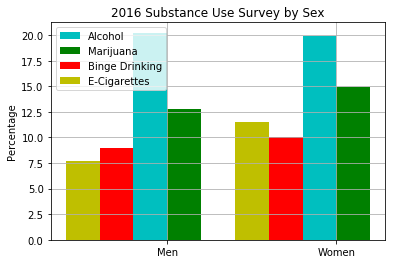

In [97]:
group_by_sex = group_summary.drop(['All 10th graders','All 12th graders','All 8th graders','Black or African American','White'])

x = group_by_sex.index
y_alcohol = group_by_sex['Alcohol2/']
y_marijuana = group_by_sex['Marijuana']
y_bingedrinking = group_by_sex['Binge drinking3/']
y_ecigarette = group_by_sex['E-cigarettes']
_X = np.arange(len(x))

width =.2
plt.ylabel('Percentage')
plt.title('2016 Substance Use Survey by Sex')
plt.xticks(_X + width / 2, ('Men','Women'))

plt.bar(_X, y_alcohol,width, color='c',label='Alcohol')
plt.bar(_X + width, y_marijuana,width, color='g', label='Marijuana')
plt.bar(_X - width, y_bingedrinking,width, color='r', label='Binge Drinking')
plt.bar(_X-2*(width), y_ecigarette,width, color='y', label='E-Cigarettes')

plt.legend(loc='best')
plt.grid()

plt.show
plt.savefig('2016 Substance Abuse by Sex.png',dpi=300)

### Graph by Race 

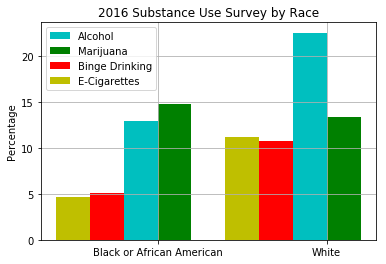

In [96]:
group_by_race = group_summary.drop(['All 10th graders','All 12th graders','All 8th graders','Male','Female'])

x = group_by_race.index
y_alcohol = group_by_race['Alcohol2/']
y_marijuana = group_by_race['Marijuana']
y_bingedrinking = group_by_race['Binge drinking3/']
y_ecigarette = group_by_race['E-cigarettes']
_X = np.arange(len(x))

width =.2
plt.ylabel('Percentage')
plt.title('2016 Substance Use Survey by Race')
plt.xticks(_X + width / 2, ('Black or African American','White'))

plt.bar(_X, y_alcohol,width, color='c',label='Alcohol')
plt.bar(_X + width, y_marijuana,width, color='g', label='Marijuana')
plt.bar(_X - width, y_bingedrinking,width, color='r', label='Binge Drinking')
plt.bar(_X-2*(width), y_ecigarette,width, color='y', label='E-Cigarettes')

plt.legend(loc='best')
plt.grid()

plt.show
plt.savefig('2016 Substance Abuse by Race.png',dpi=300)

### ACCIDENTAL DEATHS DUE TO SUBSTANCE

In [74]:
df1.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,DateReported,NaN,Not Reported,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


### Table 27: Drug Overdose Death Rates


In [75]:
test_group3=df2[['Age_Race','Gender','Drug','2016']]

# convert values to numeric
for col in test_group3:
   test_group3['2016'] = pd.to_numeric(test_group3['2016'], errors='coerce')

test_group3.head()

C:\Users\Thea\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Age_Race,Gender,Drug,2016
0,"All ages, age-adjusted2/",All Persons,Accidental Overdose,19.8
1,"All ages, crude",All Persons,Accidental Overdose,19.7
2,Under 15 years,All Persons,Accidental Overdose,0.2
3,15–24 years,All Persons,Accidental Overdose,12.4
4,25–34 years,All Persons,Accidental Overdose,34.6


In [76]:
#Remove gender and prepare data for plotting graph by age_group
age_summary= test_group3.pivot_table(index='Age_Race',
                                     columns='Drug',
                                     values = '2016',aggfunc='first')
age_summary=age_summary.drop(['All ages, age-adjusted2/','All ages, crude','American Indian or Alaska Native',\
                             'Asian or Pacific Islander','Black or African American','Black, not Hispanic or Latino',\
                             'Hispanic or Latino','White','White, not Hispanic or Latino'])

age_summary

Drug,Accidental Overdose,Opiods,odeine_oxycodone
Age_Race,,,
15–24 years,12.4,2.3,9.3
25–34 years,34.6,6.3,25.9
35–44 years,35.0,7.7,24.1
45–54 years,34.5,8.7,21.2
55–64 years,25.6,7.2,15.2
65–74 years,8.2,2.3,4.2
75–84 years,3.4,0.9,1.2
85 years and over,4.0,0.6,0.9
Under 15 years,0.2,0.1,0.1


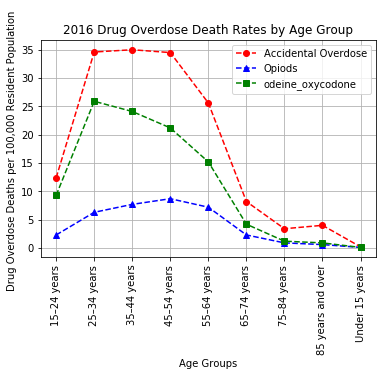

<Figure size 432x288 with 0 Axes>

In [98]:
x_axis=age_summary.index
y_od=age_summary['Accidental Overdose']
y_opi=age_summary['Opiods']
y_oxy=age_summary['odeine_oxycodone']


plt.title('2016 Drug Overdose Death Rates by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Drug Overdose Deaths per 100,000 Resident Population ')
plt.grid(b=True)
plt.plot(x_axis,y_od,color='red',marker='o',linestyle='--')
plt.plot(x_axis,y_opi,color='blue',marker='^',linestyle='--')
plt.plot(x_axis,y_oxy,color='green',marker='s',linestyle='--')

# turn off x axis labeling
plt.xticks(rotation='vertical')

plt.legend()
plt.show()
plt.savefig('2016 Drug Overdose Death Rates by Age Group.png',dpi=300)

In [78]:
race_summary= test_group3.pivot_table(index='Age_Race',
                                     columns='Drug',
                                     values = '2016',aggfunc='first')
race_summary=race_summary.drop(['All ages, age-adjusted2/','All ages, crude','15–24 years','25–34 years','35–44 years',\
                               '45–54 years','55–64 years','65–74 years','75–84 years','85 years and over',\
                               'Under 15 years'])

race_summary

Drug,Accidental Overdose,Opiods,odeine_oxycodone
Age_Race,,,
American Indian or Alaska Native,17.7,NaN,10.2
Asian or Pacific Islander,4.7,NaN,2.3
Black or African American,24.0,NaN,14.7
"Black, not Hispanic or Latino",24.7,NaN,15.1
Hispanic or Latino,13.9,NaN,9.2
White,28.8,NaN,20.4
"White, not Hispanic or Latino",32.7,NaN,23.4


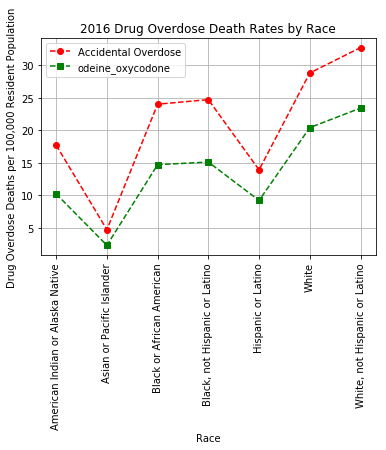

<Figure size 432x288 with 0 Axes>

In [99]:
x_axis=race_summary.index
y_od=race_summary['Accidental Overdose']

y_oxy=race_summary['odeine_oxycodone']


plt.title('2016 Drug Overdose Death Rates by Race')
plt.xlabel('Race')
plt.ylabel('Drug Overdose Deaths per 100,000 Resident Population')
plt.grid(b=True)
plt.plot(x_axis,y_od,color='red',marker='o',linestyle='--')
plt.plot(x_axis,y_oxy,color='green',marker='s',linestyle='--')

# rotate x labels to fit the long strings
plt.xticks(rotation='vertical')

plt.legend()
plt.show()
plt.savefig('2016 Substance Abuse by Age.png',dpi=300)